In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Нужно куда-то добавить файл и скопировать к нему путь
file_path = "Hotel Reservations.csv"

# Load the latest version
data_set = pd.read_csv('https://raw.githubusercontent.com/bublX/python_project/refs/heads/main/Hotel%20Reservations.csv')

In [17]:
df = data_set.copy()
# Исключаем столбец Booking_ID, его кодировать не нужно, эти данные мусор
df = df.drop(columns=['Booking_ID'])

# Кодируем нечисловые столбцы
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
encoders = {}
for i in categorical_columns:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype(str))
    encoders[i] = le

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: repeated_guest, Length: 5000, dtype: int64

In [5]:
# Преобразует данные так, чтобы они имели среднее значение 0 и стандартное отклонение 1.(В нем уже происходит центрирование)
# Нужно у него спросить, может надо самим написать эту функцию
# Есть ещё метод MinMaxScaler, но он хуже подходит к PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Статистика

In [6]:
num_column = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
stats = df[num_column].describe()
print(stats)

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
count       36275.000000                36275.000000        36275.000000   
mean            0.515644                    0.030986            0.708890   
std             1.048131                    0.17328

# Подбираю оптимальное число главных компонет
Получается, что 11 компонент сохраняет 80% информации о графике

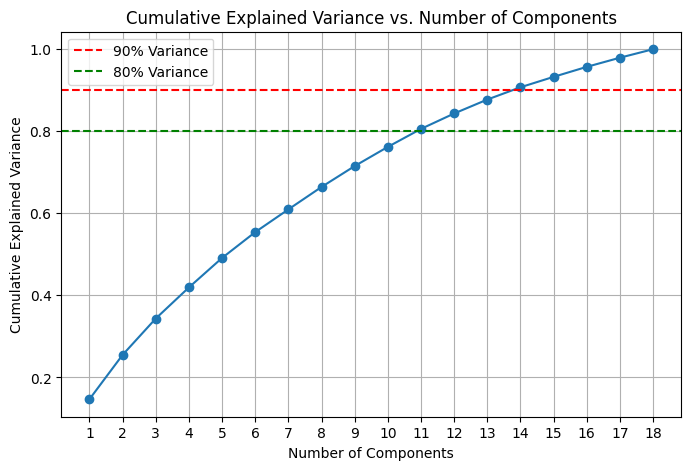

Number of components explaining 80% variance: 11


In [7]:
pca = PCA()
pca.fit(data_scaled)

# Кумулятивная объясненная дисперсия
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.8, color='g', linestyle='--', label='80% Variance')
plt.legend()
plt.show()

n_components_80 = np.argmax(cumulative_variance > 0.8) + 1
print(f"Number of components explaining 80% variance: {n_components_80}")

In [8]:
pca = PCA(n_components=n_components_80)
data_pca = pca.fit_transform(data_scaled)
pca_result = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# График нагрузок
Чем ближе точка к оси главной компоненты, тем сильнее она вносит вклад в нее. Точки, которые рядом с началом вносят мало

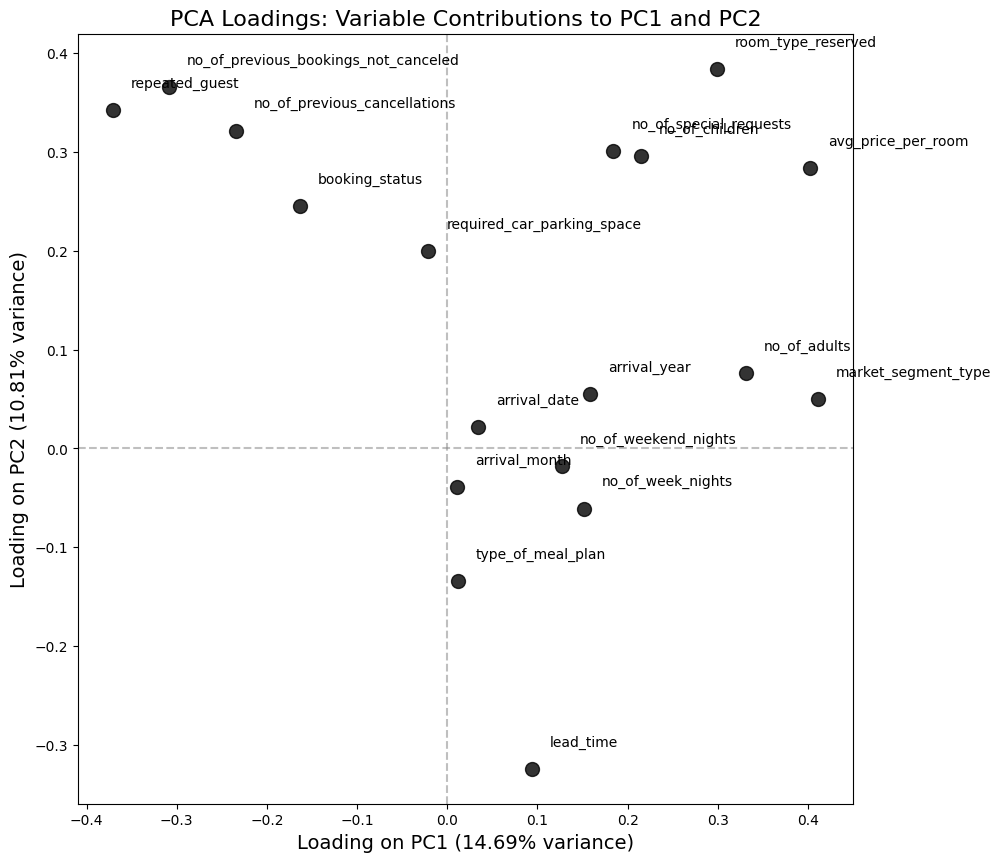

Суммарная доля дисперсии: 80.58%


In [10]:
plt.figure(figsize=(10, 10))
loadings = pca.components_.T  # Транспонируем, чтобы переменные были строками

for i, var in enumerate(df.columns):
    plt.scatter(loadings[i, 0], loadings[i, 1], color='black', s=100, alpha=0.8)
    plt.text(loadings[i, 0] + 0.02, loadings[i, 1] + 0.02, var, fontsize=10, ha='left', va='bottom')

plt.xlabel(f'Loading on PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=14)
plt.ylabel(f'Loading on PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=14)
plt.title('PCA Loadings: Variable Contributions to PC1 and PC2', fontsize=16)

plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
plt.axvline(0, color='grey', linestyle='--', alpha=0.5)

plt.show()

print(f"Суммарная доля дисперсии: {sum(pca.explained_variance_ratio_[:n_components_80]):.2%}")

# Далее, вывожу все графики

# no_of_adults

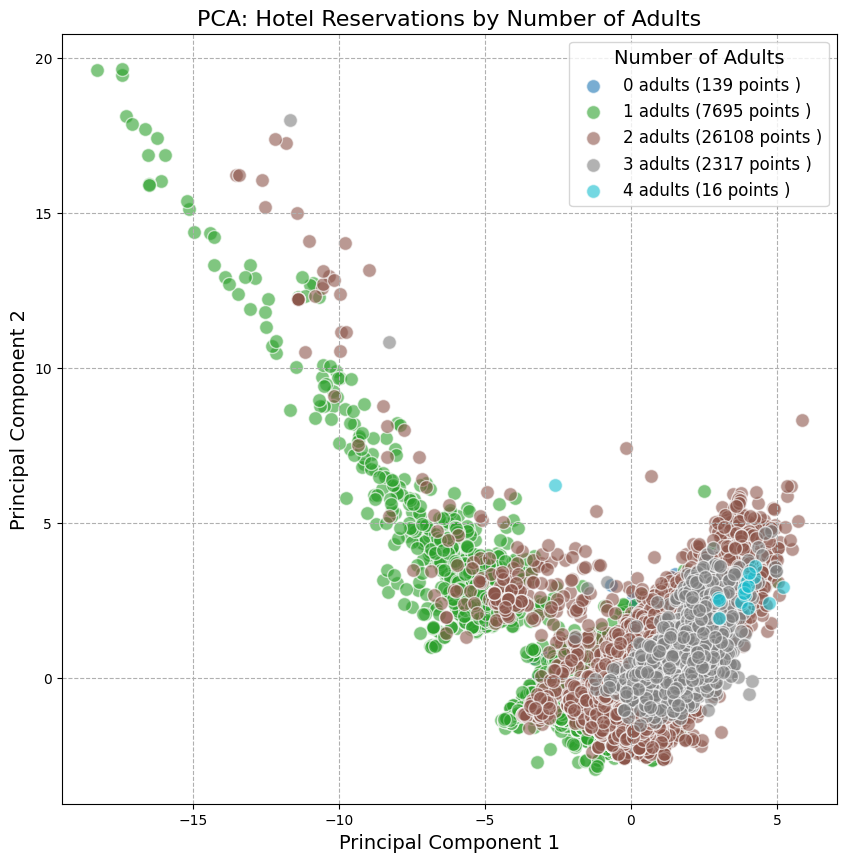

In [ ]:
pca_result['target'] = data_set['no_of_adults'].values

labels = list(range(5))

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('tab10', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'{target} adults ({len(subset)} points )',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel(f'Principal Component 1', fontsize=14)
plt.ylabel(f'Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Number of Adults', fontsize=16)

# Настраиваем легенду
plt.legend(title='Number of Adults', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()

# ***no_of_children***

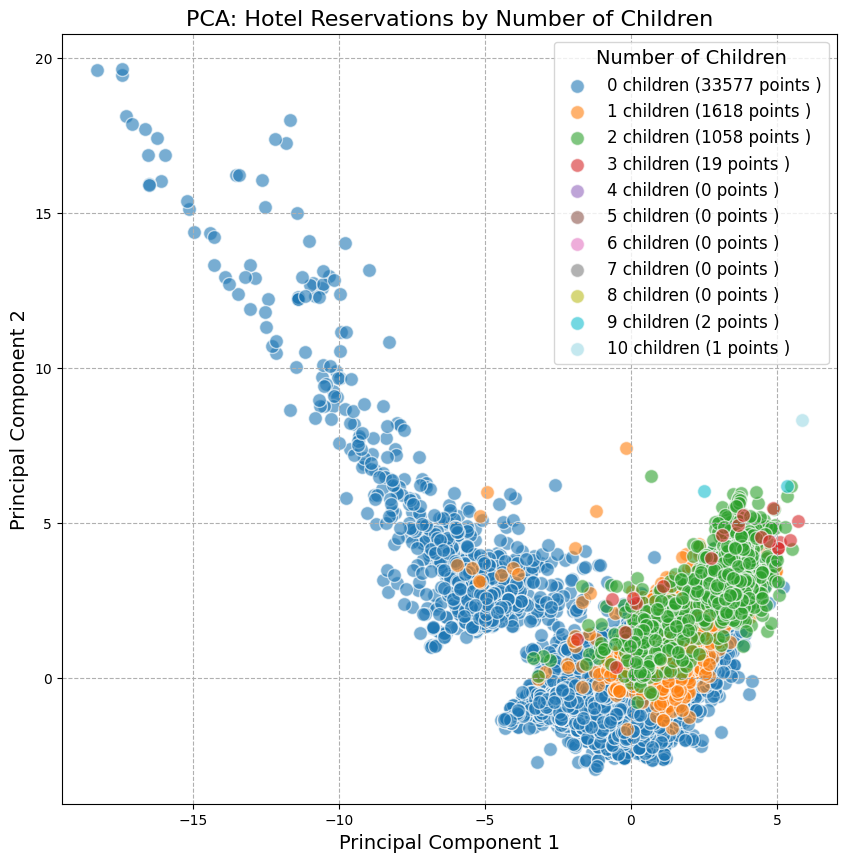

In [ ]:
pca_result['target'] = data_set['no_of_children'].values

labels = list(range(11))

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('tab20', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'{target} children ({len(subset)} points )',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel(f'Principal Component 1', fontsize=14)
plt.ylabel(f'Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Number of Children', fontsize=16)

plt.legend(title='Number of Children', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()

# no_of_weekend_nights

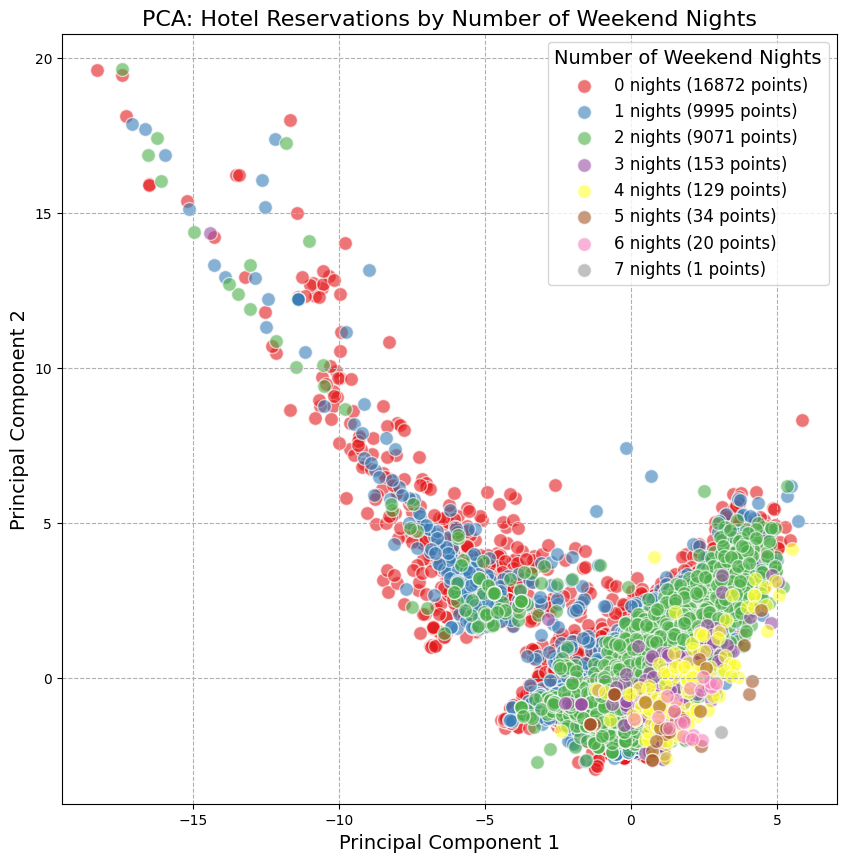

In [ ]:
pca_result['target'] = data_set['no_of_weekend_nights'].values
labels = list(range(8))

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'{target} nights ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel(f'Principal Component 1', fontsize=14)
plt.ylabel(f'Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Number of Weekend Nights', fontsize=16)

plt.legend(title='Number of Weekend Nights', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()

# week_nights_category

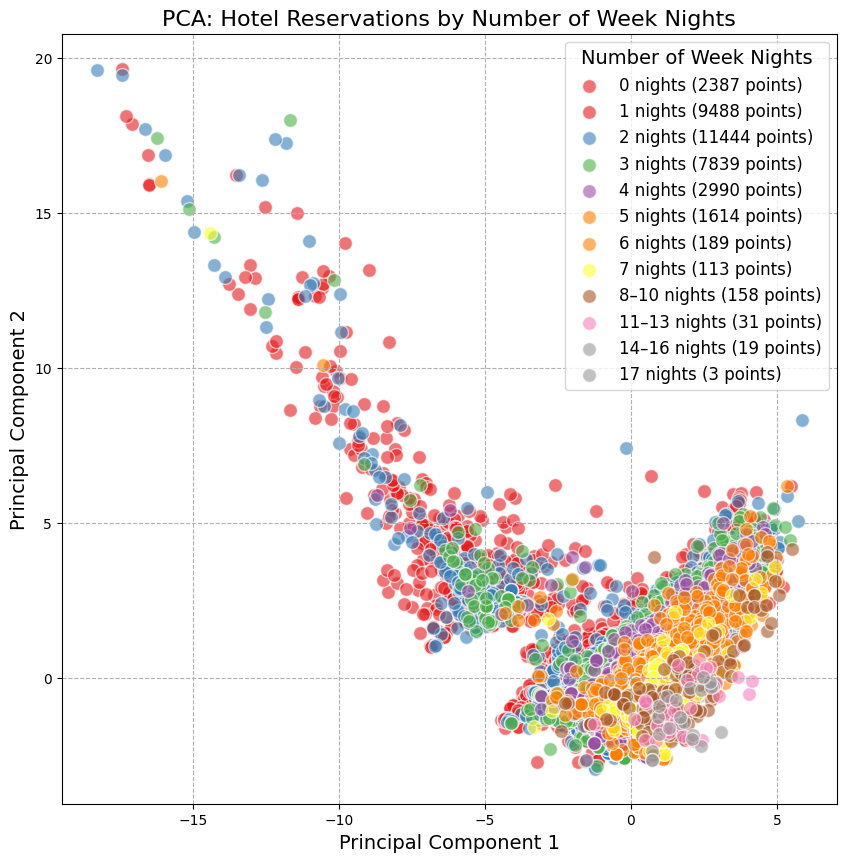

In [ ]:

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 14, 17, float('inf')]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8–10', '11–13', '14–16', '17']
data_set['week_nights_category'] = pd.cut(data_set['no_of_week_nights'], bins=bins, labels=labels, include_lowest=True, right=False)
# Добавление столбца week_nights_category в результаты PCA
pca_result['target'] = data_set['week_nights_category'].values

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'{target} nights ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel(f'Principal Component 1', fontsize=14)
plt.ylabel(f'Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Number of Week Nights', fontsize=16)


plt.legend(title='Number of Week Nights', loc='upper right', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')
plt.show()

# type_of_meal_plan

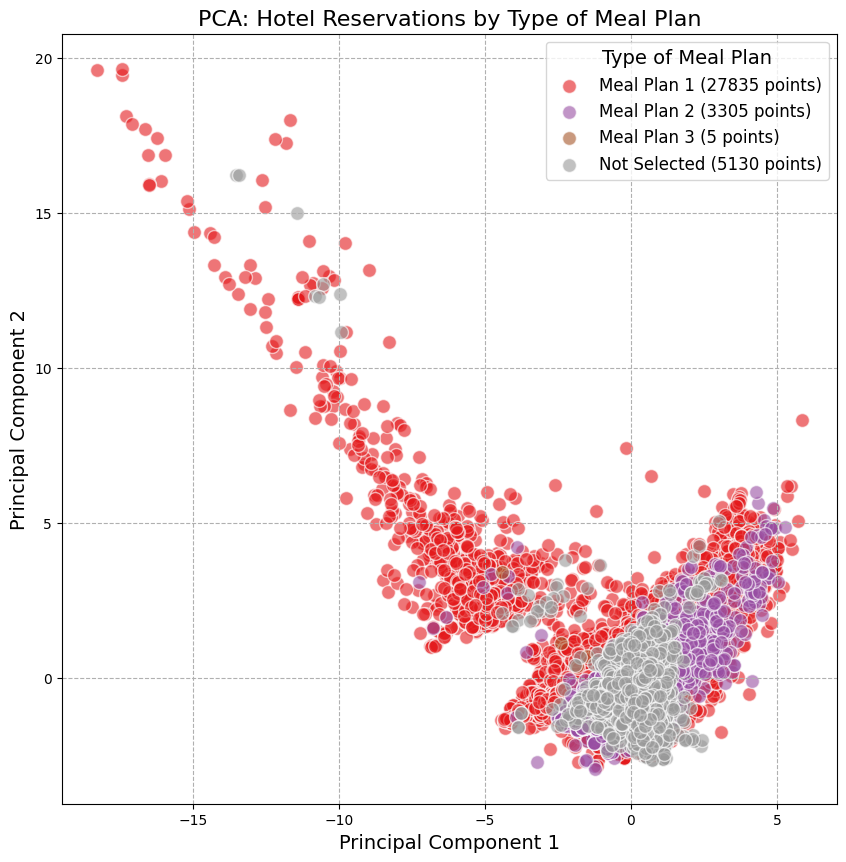

In [ ]:
pca_result['target'] = df['type_of_meal_plan'].values

# Уникальные значения type_of_meal_plan
labels = list(encoders['type_of_meal_plan'].classes_)

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == i]  # i соответствует закодированному значению
    plt.scatter(subset['PC1'], subset['PC2'], label=f'{target} ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel(f'Principal Component 1', fontsize=14)
plt.ylabel(f'Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Type of Meal Plan', fontsize=16)

plt.legend(title='Type of Meal Plan', loc='upper right', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()


# required_car_parking_space

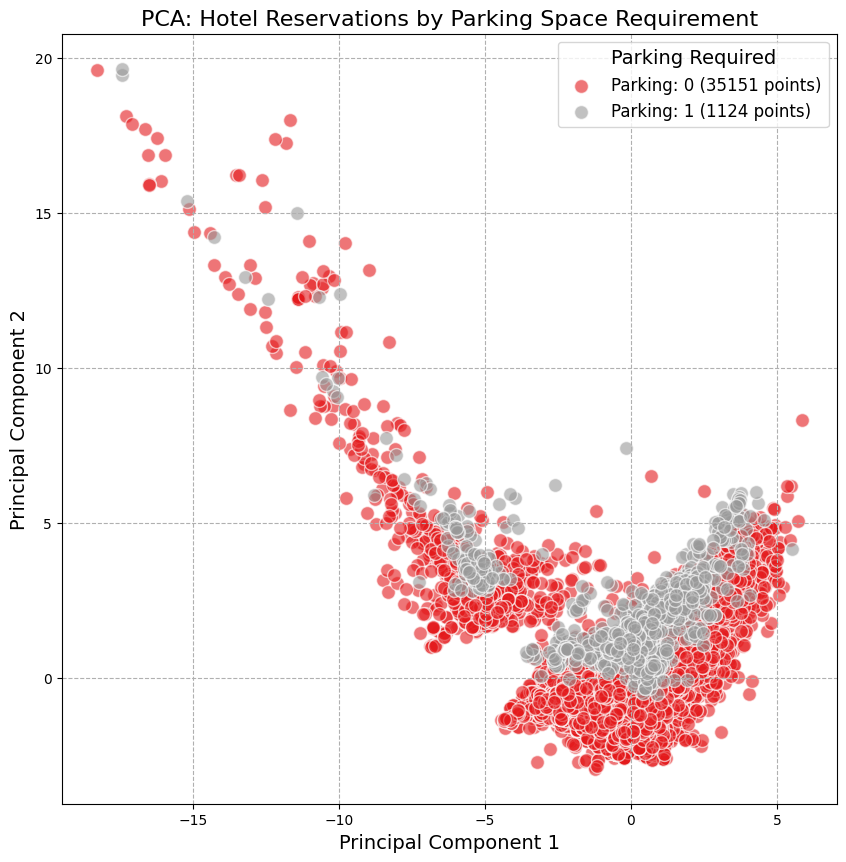

In [ ]:
pca_result['target'] = data_set['required_car_parking_space'].values
labels = [0, 1]

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Parking: {target} ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Parking Space Requirement', fontsize=16)

plt.legend(title='Parking Required', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()


# room_type_reserved

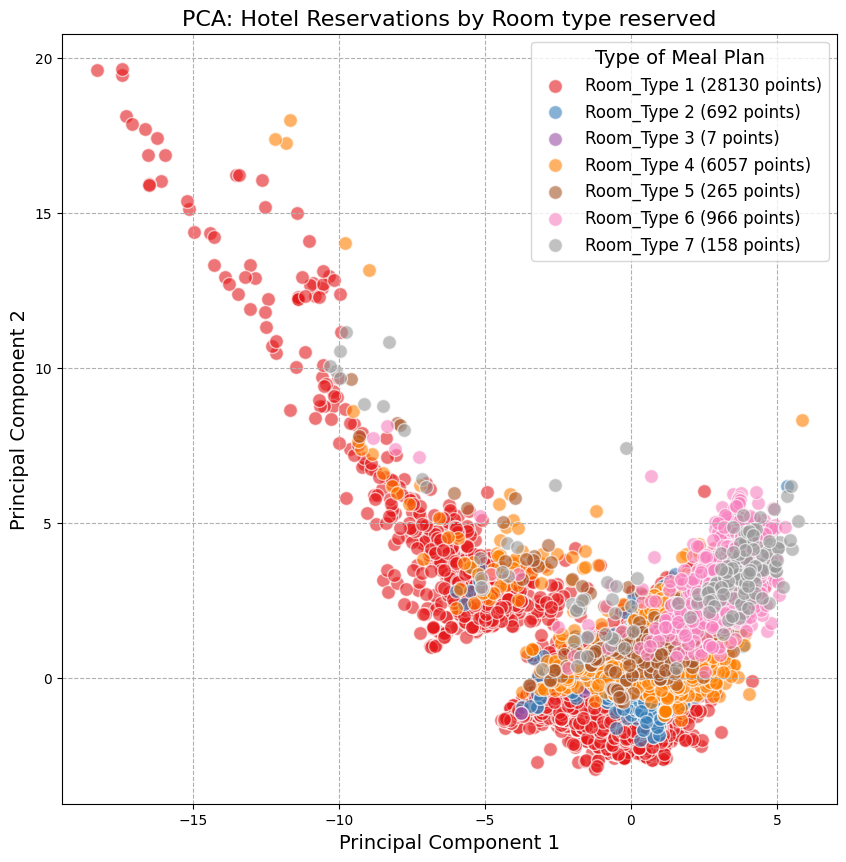

In [ ]:
pca_result['target'] = df['room_type_reserved'].values

# Используем оригинальные категории
labels = list(encoders['room_type_reserved'].classes_)

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == i]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'{target} ({len(subset)} points)',
                    color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel(f'Principal Component 1', fontsize=14)
plt.ylabel(f'Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Room type reserved', fontsize=16)

plt.legend(title='Type of Meal Plan', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()


# lead_time

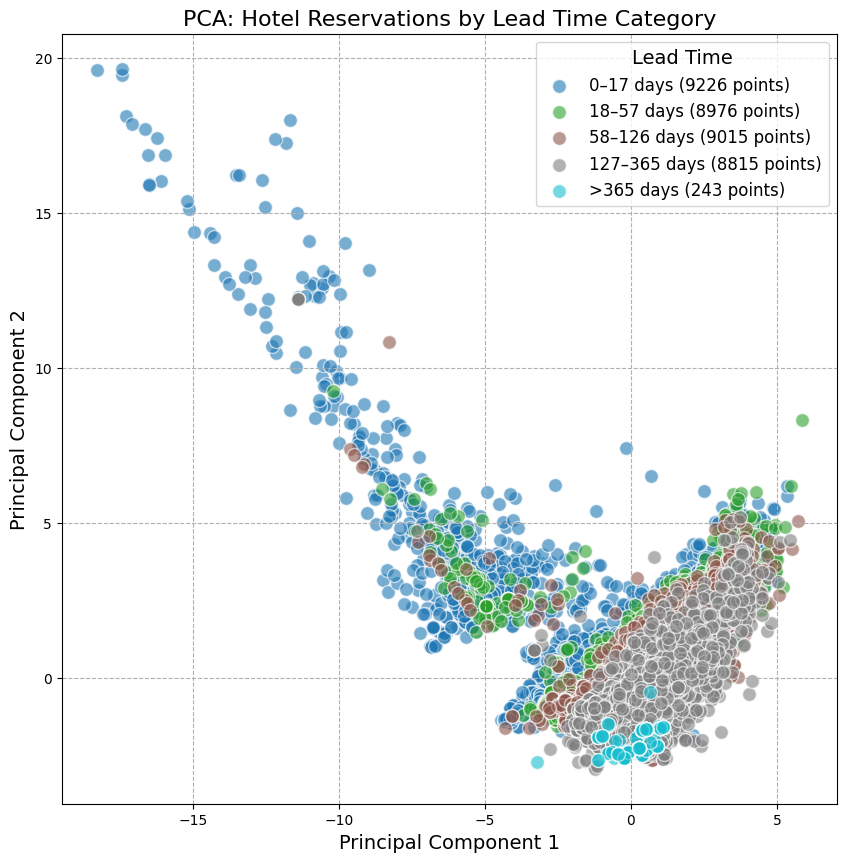

In [ ]:
# Категоризация lead_time на основе статистики
bins = [0, 17, 57, 126, 365, float('inf')]
labels = ['0–17 days', '18–57 days', '58–126 days', '127–365 days', '>365 days']
data_set['lead_time_category'] = pd.cut(data_set['lead_time'], bins=bins, labels=labels, include_lowest=True)

pca_result['target'] = data_set['lead_time_category'].values

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('tab10', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'{target} ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel(f'Principal Component 1', fontsize=14)
plt.ylabel(f'Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Lead Time Category', fontsize=16)

plt.legend(title='Lead Time', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()

# arrival_year

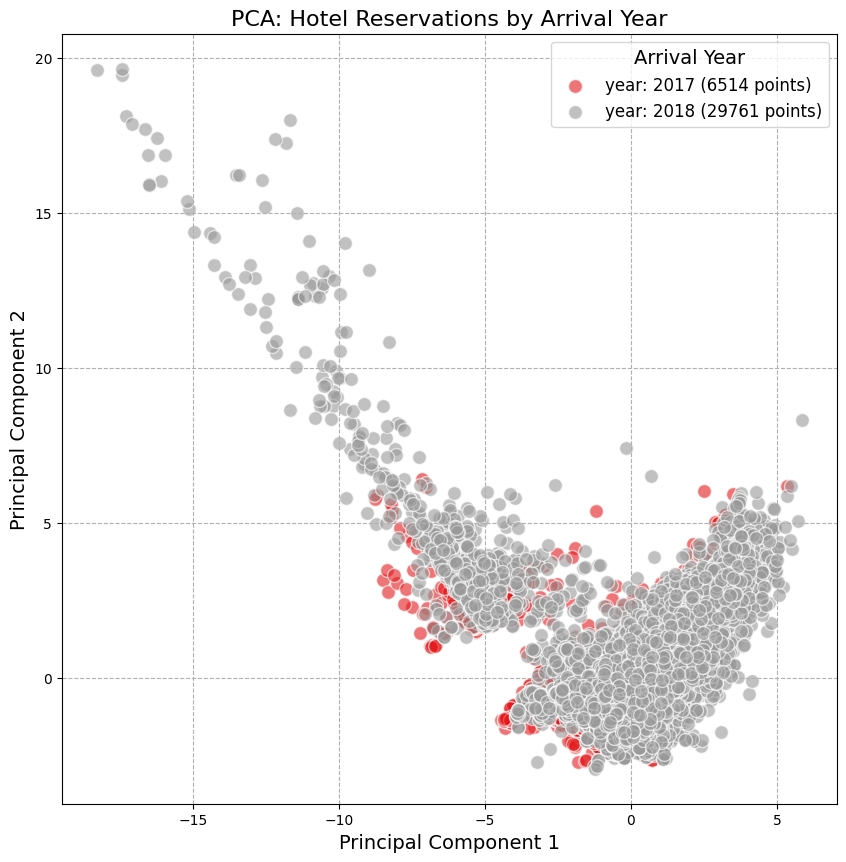

In [ ]:
pca_result['target'] = data_set['arrival_year'].values

labels = [2017, 2018]

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'year: {target} ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Arrival Year', fontsize=16)

# Configure legend
plt.legend(title='Arrival Year', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()

# arrival_month

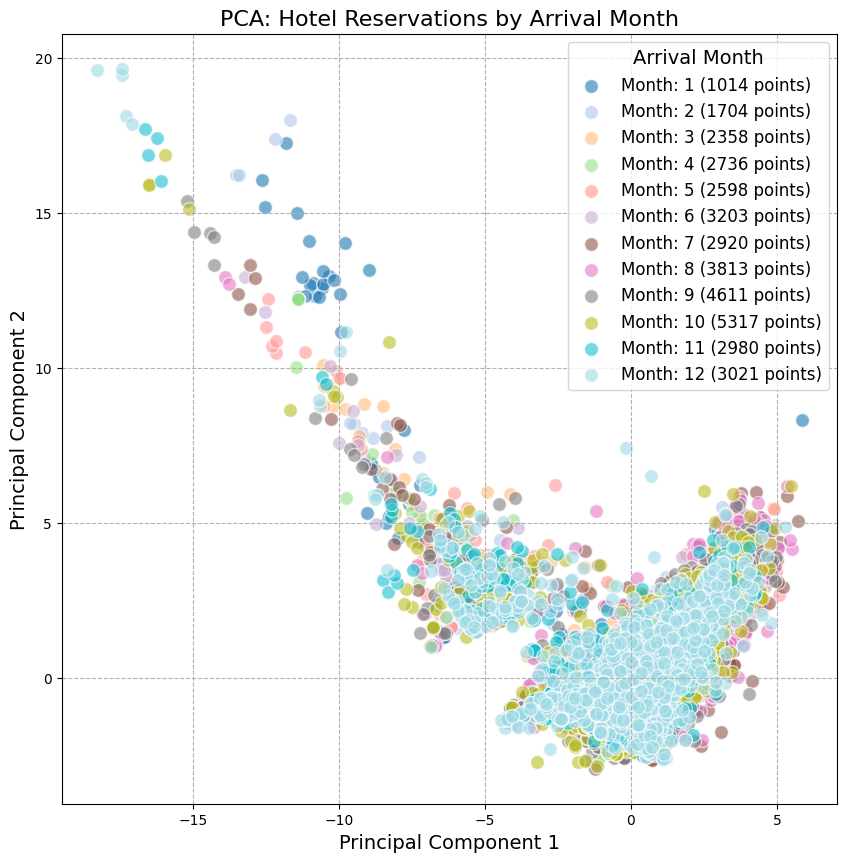

In [ ]:
pca_result['target'] = data_set['arrival_month'].values

labels = list(range(1, 13))

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('tab20', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Month: {target} ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Arrival Month', fontsize=16)

plt.legend(title='Arrival Month', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()

# arrival_date

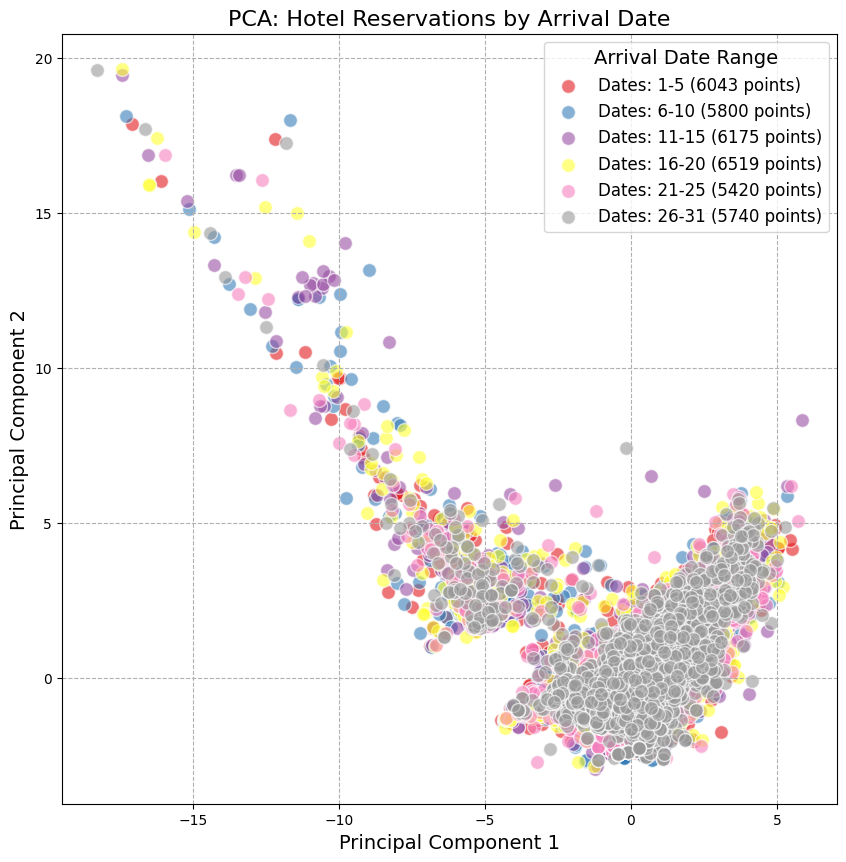

In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30]
bin_labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-31']
pca_result['target'] = pd.cut(data_set['arrival_date'], bins=bins, labels=bin_labels, include_lowest=True)

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(bin_labels))

for i, target in enumerate(bin_labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Dates: {target} ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Arrival Date', fontsize=16)

plt.legend(title='Arrival Date Range', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()

# market_segment_type

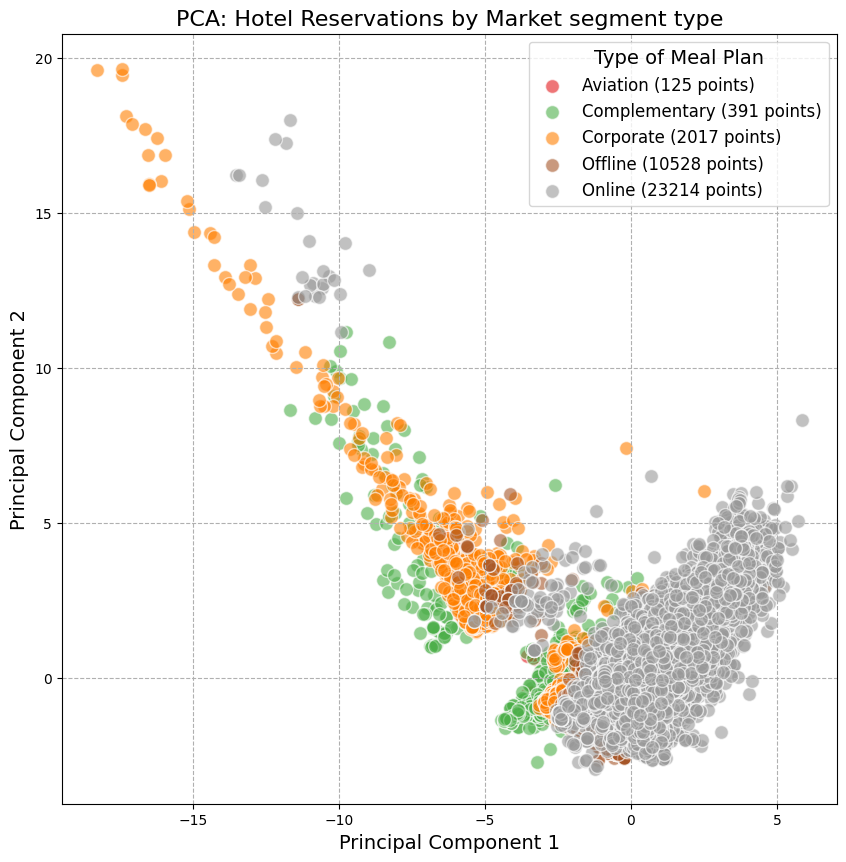

In [ ]:
pca_result['target'] = df['market_segment_type'].values

labels = list(encoders['market_segment_type'].classes_)

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == i]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'{target} ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel(f'Principal Component 1', fontsize=14)
plt.ylabel(f'Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Market segment type', fontsize=16)

plt.legend(title='Type of Meal Plan', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()

# ***Важное***: repeated_guest

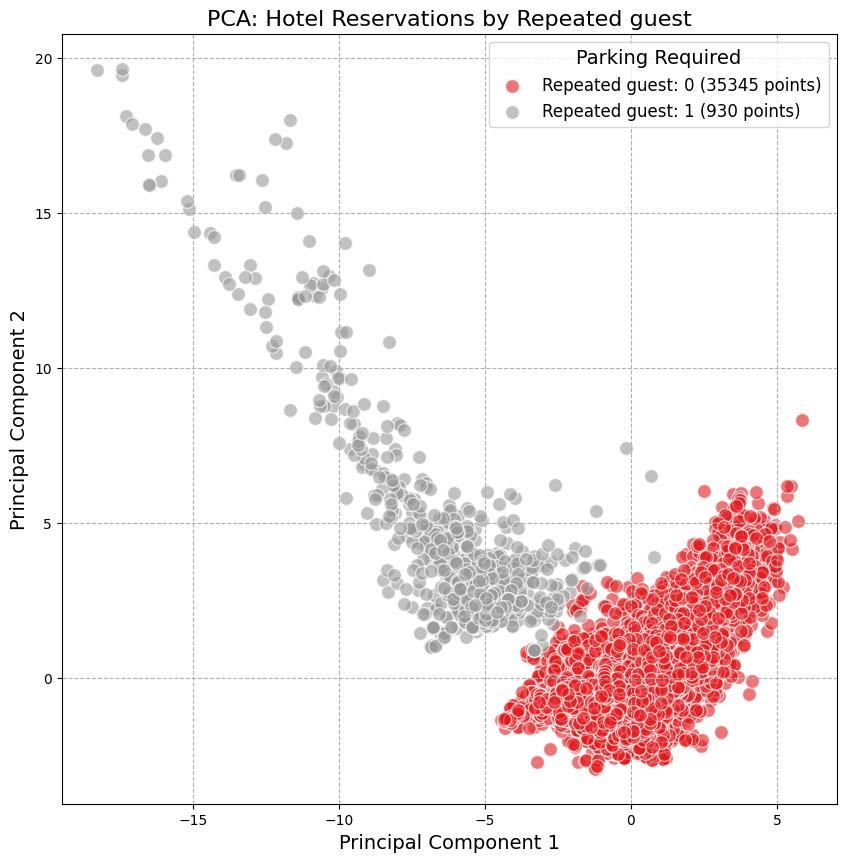

In [ ]:
pca_result['target'] = data_set['repeated_guest'].values
labels = [0, 1]

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Repeated guest: {target} ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Repeated guest', fontsize=16)

plt.legend(title='Parking Required', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()


# ***ВАЖНОЕ*** : no_of_previous_cancellations

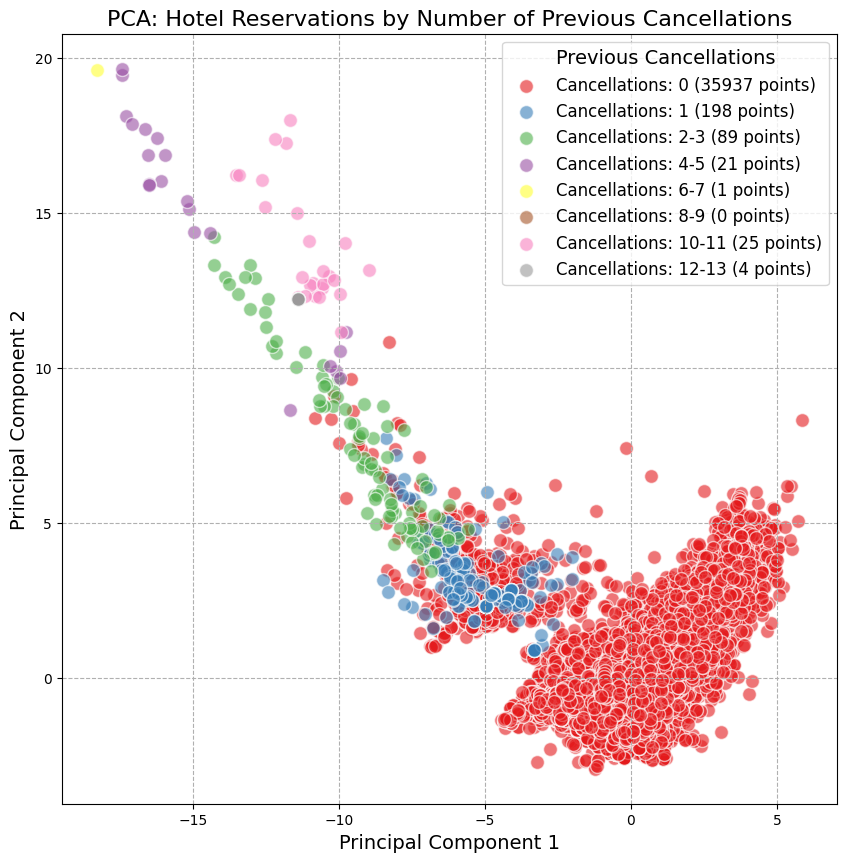

In [12]:
bins = [-1, 0, 1, 3, 5, 7, 9, 11, 13]
bin_labels = ['0','1','2-3', '4-5', '6-7', '8-9', '10-11', '12-13']
pca_result['target'] = pd.cut(data_set['no_of_previous_cancellations'], bins=bins, labels=bin_labels, include_lowest=True)

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(bin_labels))

for i, target in enumerate(bin_labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cancellations: {target} ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Number of Previous Cancellations', fontsize=16)

plt.legend(title='Previous Cancellations', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')
plt.savefig('Previous Cancellations.png', dpi = 300)
plt.show()

# no_of_previous_bookings_not_canceled

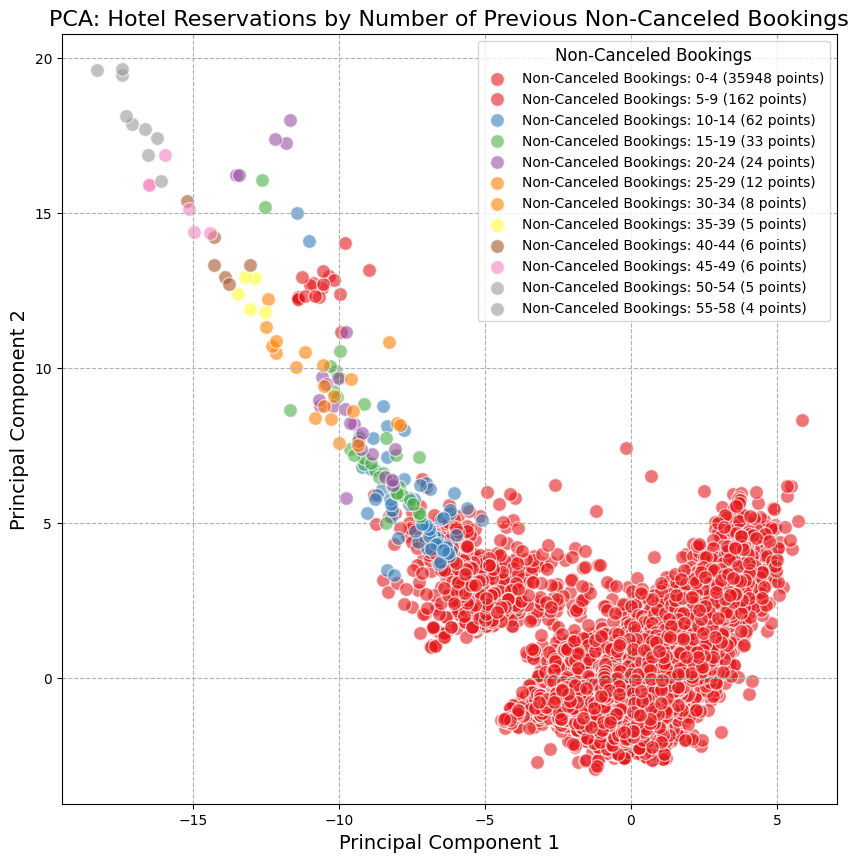

In [13]:
bins = [-1, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 58]
bin_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-58']
pca_result['target'] = pd.cut(data_set['no_of_previous_bookings_not_canceled'], bins=bins, labels=bin_labels, include_lowest=True)

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(bin_labels))

for i, target in enumerate(bin_labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Non-Canceled Bookings: {target} ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Number of Previous Non-Canceled Bookings', fontsize=16)

plt.legend(title='Non-Canceled Bookings', fontsize=10, title_fontsize=12)
plt.grid(linestyle='--')
plt.savefig('Non-Canceled Bookings.png', dpi = 300)
plt.show()


# avg_price_per_room

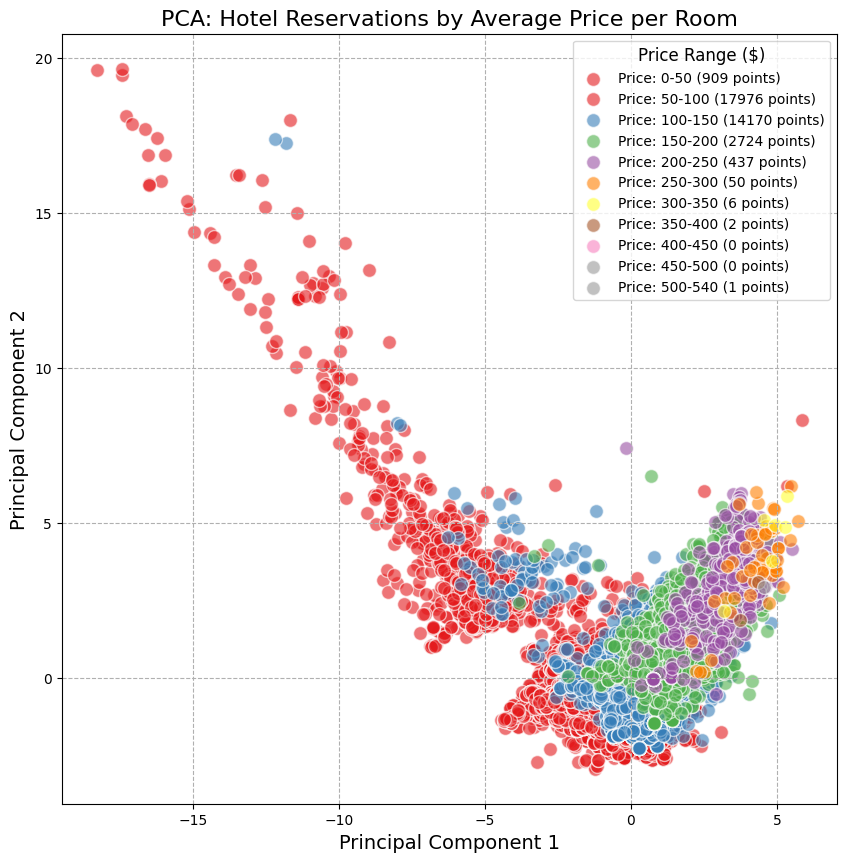

In [ ]:
bins = [-1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
bin_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-540']
pca_result['target'] = pd.cut(data_set['avg_price_per_room'], bins=bins, labels=bin_labels, include_lowest=True)

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(bin_labels))

for i, target in enumerate(bin_labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Price: {target} ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Average Price per Room', fontsize=16)

plt.legend(title='Price Range ($)', fontsize=10, title_fontsize=12)
plt.grid(linestyle='--')

plt.show()


# no_of_special_requests

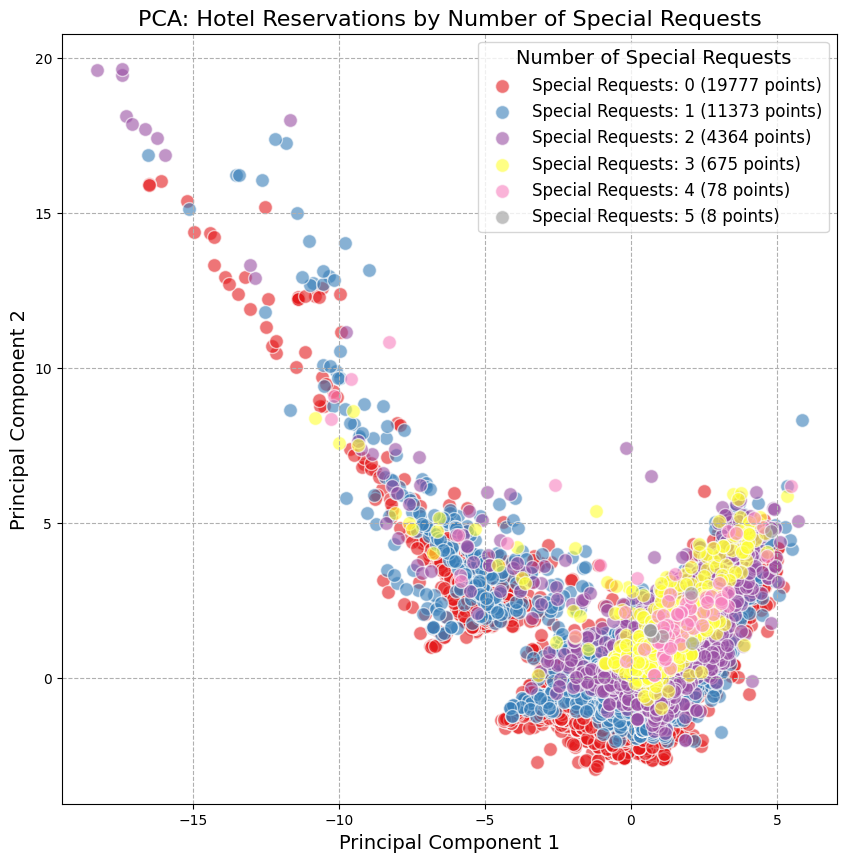

In [ ]:
pca_result['target'] = data_set['no_of_special_requests'].values

labels = list(range(0, 6))

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Special Requests: {target} ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Number of Special Requests', fontsize=16)

plt.legend(title='Number of Special Requests', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()

# booking_status

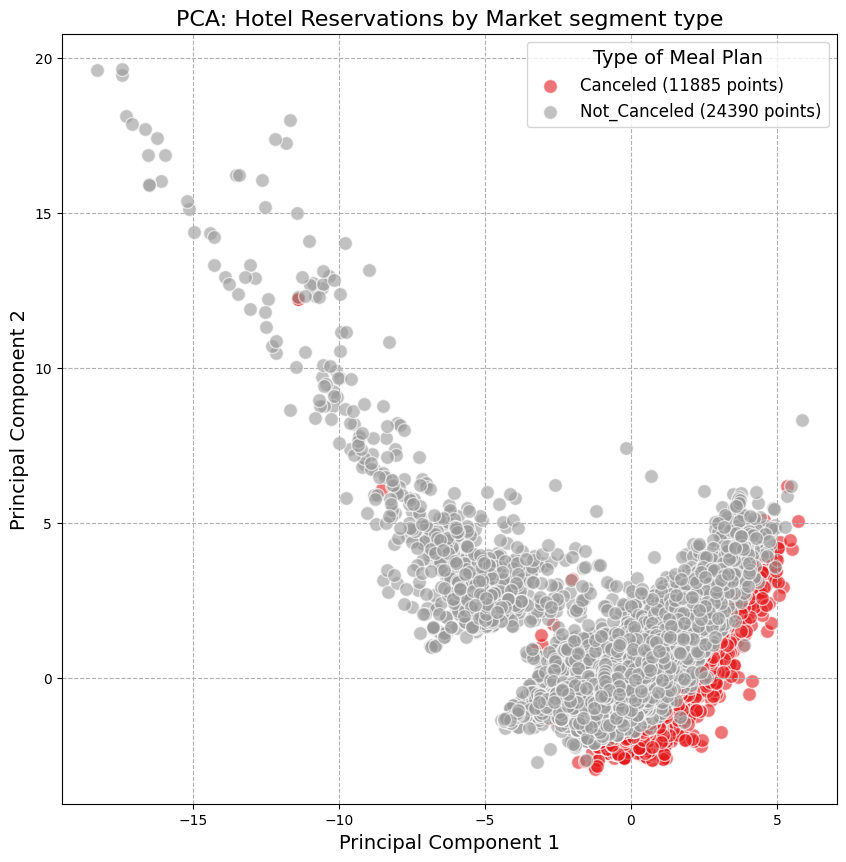

In [ ]:
pca_result['target'] = df['booking_status'].values

labels = list(encoders['booking_status'].classes_)

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('Set1', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == i]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'{target} ({len(subset)} points)',
                    color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel(f'Principal Component 1', fontsize=14)
plt.ylabel(f'Principal Component 2', fontsize=14)
plt.title('PCA: Hotel Reservations by Market segment type', fontsize=16)

plt.legend(title='Type of Meal Plan', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')

plt.show()

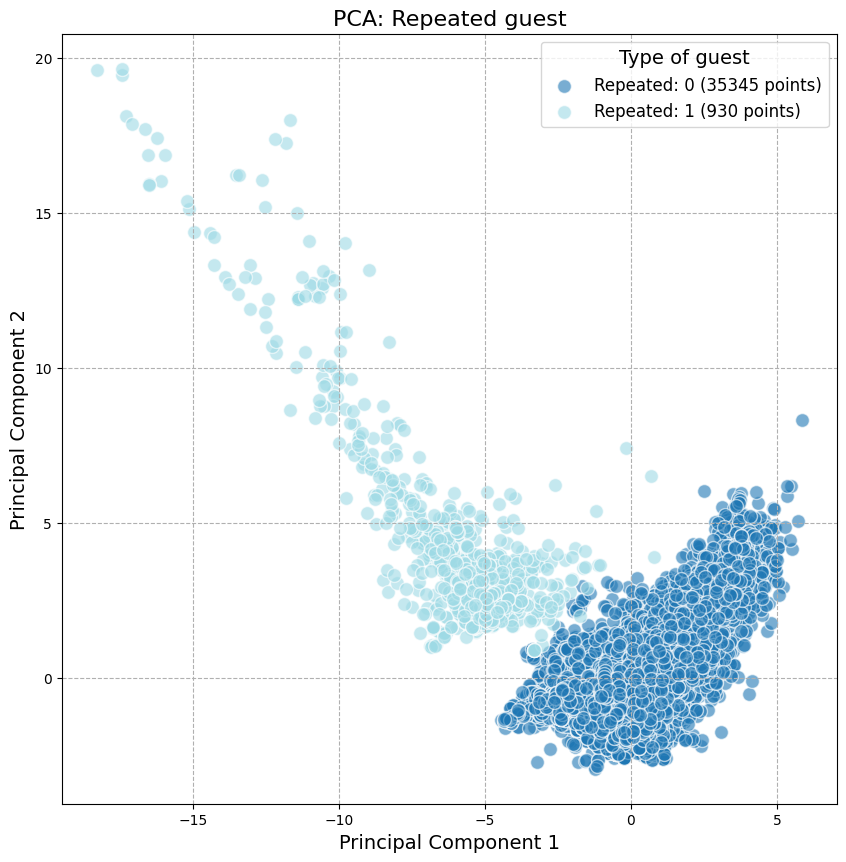

In [20]:
pca_result['target'] = data_set['repeated_guest'].values

labels = [0, 1]

plt.figure(figsize=(10, 10))
colors = plt.get_cmap('tab20', len(labels))

for i, target in enumerate(labels):
    subset = pca_result[pca_result['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Repeated: {target} ({len(subset)} points)',
                color=colors(i), s=100, alpha=0.6, edgecolors='w')

plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA: Repeated guest', fontsize=16)

plt.legend(title='Type of guest', fontsize=12, title_fontsize=14)
plt.grid(linestyle='--')
plt.savefig('Repeated guest', dpi = 300)
plt.show()